#Importing

In [37]:
# libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# functions:
from sklearn.model_selection import train_test_split                                            #split data 
from sklearn.tree import DecisionTreeClassifier                                                 #Decision Tree classifier
from sklearn import tree                                                                        #tree plotting
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score     #metrics 
from sklearn.dummy import DummyClassifier                                                       #Dummy classifier
from mlxtend.plotting import plot_learning_curves                                               #learning curves
from sklearn.model_selection import cross_val_score                                             #cross-validation

In [38]:
df = pd.read_csv('final_dataset.csv')                               #reading dataset

###Selecting columns and splitting data

In [39]:
# defining features names
features = list(df.columns)

In [40]:
target = "class"                                                    #target name
y = df[target].values                                               #target values
features.remove(target)                                             #removing target from features
x = df[features].values                                             #feature values

# splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)

#Training Classifier

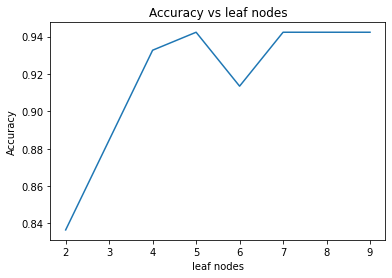

In [41]:
# Finding the optimum number of max_leaf_nodes
list1 = []
for leaves in range(2,10):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='gini')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test, y_pred))

plt.plot(list(range(2,10)), list1)
plt.title("Accuracy vs leaf nodes")
plt.ylabel('Accuracy')
plt.xlabel('leaf nodes')
#plt.savefig('image12.png')
plt.show()

In [42]:
# Training the Decision Tree Classifier on the training set

classifier = DecisionTreeClassifier(max_leaf_nodes = 5, max_depth = 3, random_state=0, criterion='gini')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

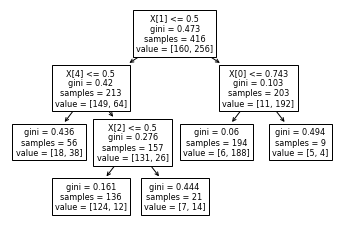

In [43]:
tree.plot_tree(classifier);

In [44]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 1.]


#Evaluating

Dummy classifier

In [45]:
dummy_clf = DummyClassifier(strategy = 'uniform').fit(x_train, y_train)   #dummy classifier with uniform rule
y_dummy_predictions = dummy_clf.predict(x_test)                                 #making predictions with dummy classifier

y_dummy_predictions

array([0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 1.])

In [46]:
dummy_clf.score(x_test, y_test)                 #accuracy score of dummy classifier


0.5

In [47]:
precision_score(y_dummy_predictions, y_test)    #precision score of dummy classifier

0.6875

In [48]:
recall_score(y_dummy_predictions, y_test)       #recall score of dummy classifier

0.7333333333333333

Train and test accuracy

In [49]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(classifier.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(classifier.score(x_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.89
Accuracy of Decision Tree classifier on test set: 0.94


Confusion matrix

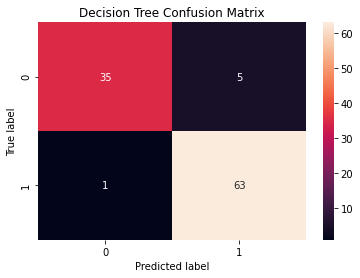

In [50]:
# Making the confusion matrix:
cm = confusion_matrix(y_test, y_pred)       #calculating (TP, TN, Fp and FN) 

df_cm = pd.DataFrame(cm)                    #transforming into a pd.DataFrame
sns.heatmap(df_cm, annot=True)              #plotting
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.savefig('image14.png')

Curves

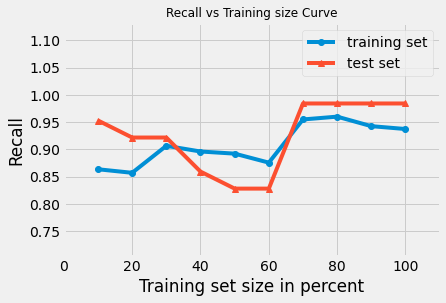

In [51]:
plot_learning_curves(x_train, y_train, x_test, y_test, classifier, scoring='recall', print_model=False)
plt.title('Recall vs Training size Curve')
plt.ylabel('Recall')
#plt.savefig('image15.png')
plt.show()

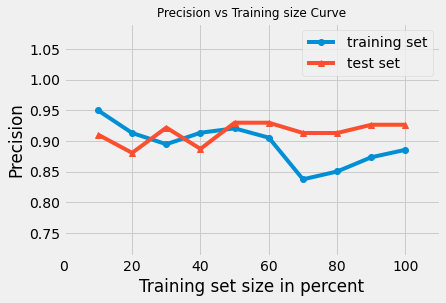

In [52]:
plot_learning_curves(x_train, y_train, x_test, y_test, classifier, scoring='precision', print_model=False)
plt.title('Precision vs Training size Curve')
plt.ylabel('Precision')
#plt.savefig('image16.png')
plt.show()

Cross-validation

In [53]:
precision = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5, scoring='precision')

print("Precision: {:.2f} %".format(precision.mean()*100))
print("Standard Deviation: {:.2f} %".format(precision.std()*100))

Precision: 88.05 %
Standard Deviation: 5.60 %


In [54]:
recall = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5, scoring='recall')

print("Recall: {:.2f} %".format(recall.mean()*100))
print("Standard Deviation: {:.2f} %".format(recall.std()*100))

Recall: 94.55 %
Standard Deviation: 3.76 %
